In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, minmax_scale

x = pd.read_csv('all.csv').fillna(method='bfill')
SP = pd.read_csv('^GSPC.csv')
SP = SP[['Date', 'Close']]
SP.columns = ['Date', 'sp']
x = pd.merge(x, SP, how='left', on='Date')

df_all = x.drop(['Date', 'vix', 'sp'], axis=1)
df = x[['Date', 'vix', 'sp']]
df.index = pd.to_datetime(df.Date)
df = df.drop('Date', axis=1)
scaler = MinMaxScaler()
df.head()

,vix,sp
Date,,
2005-01-03,14.08,1202.079956
2005-01-04,13.98,1188.050049
2005-01-05,14.09,1183.739990
2005-01-06,13.58,1187.890015
2005-01-07,13.49,1186.189941


In [2]:
def precision(list_1, list_2):
    list_1 = np.array(list_1)
    list_2 = np.array(list_2)
    flags = np.equal(list_1, list_2)
    precision = flags.sum() / len(list_2)
    return precision

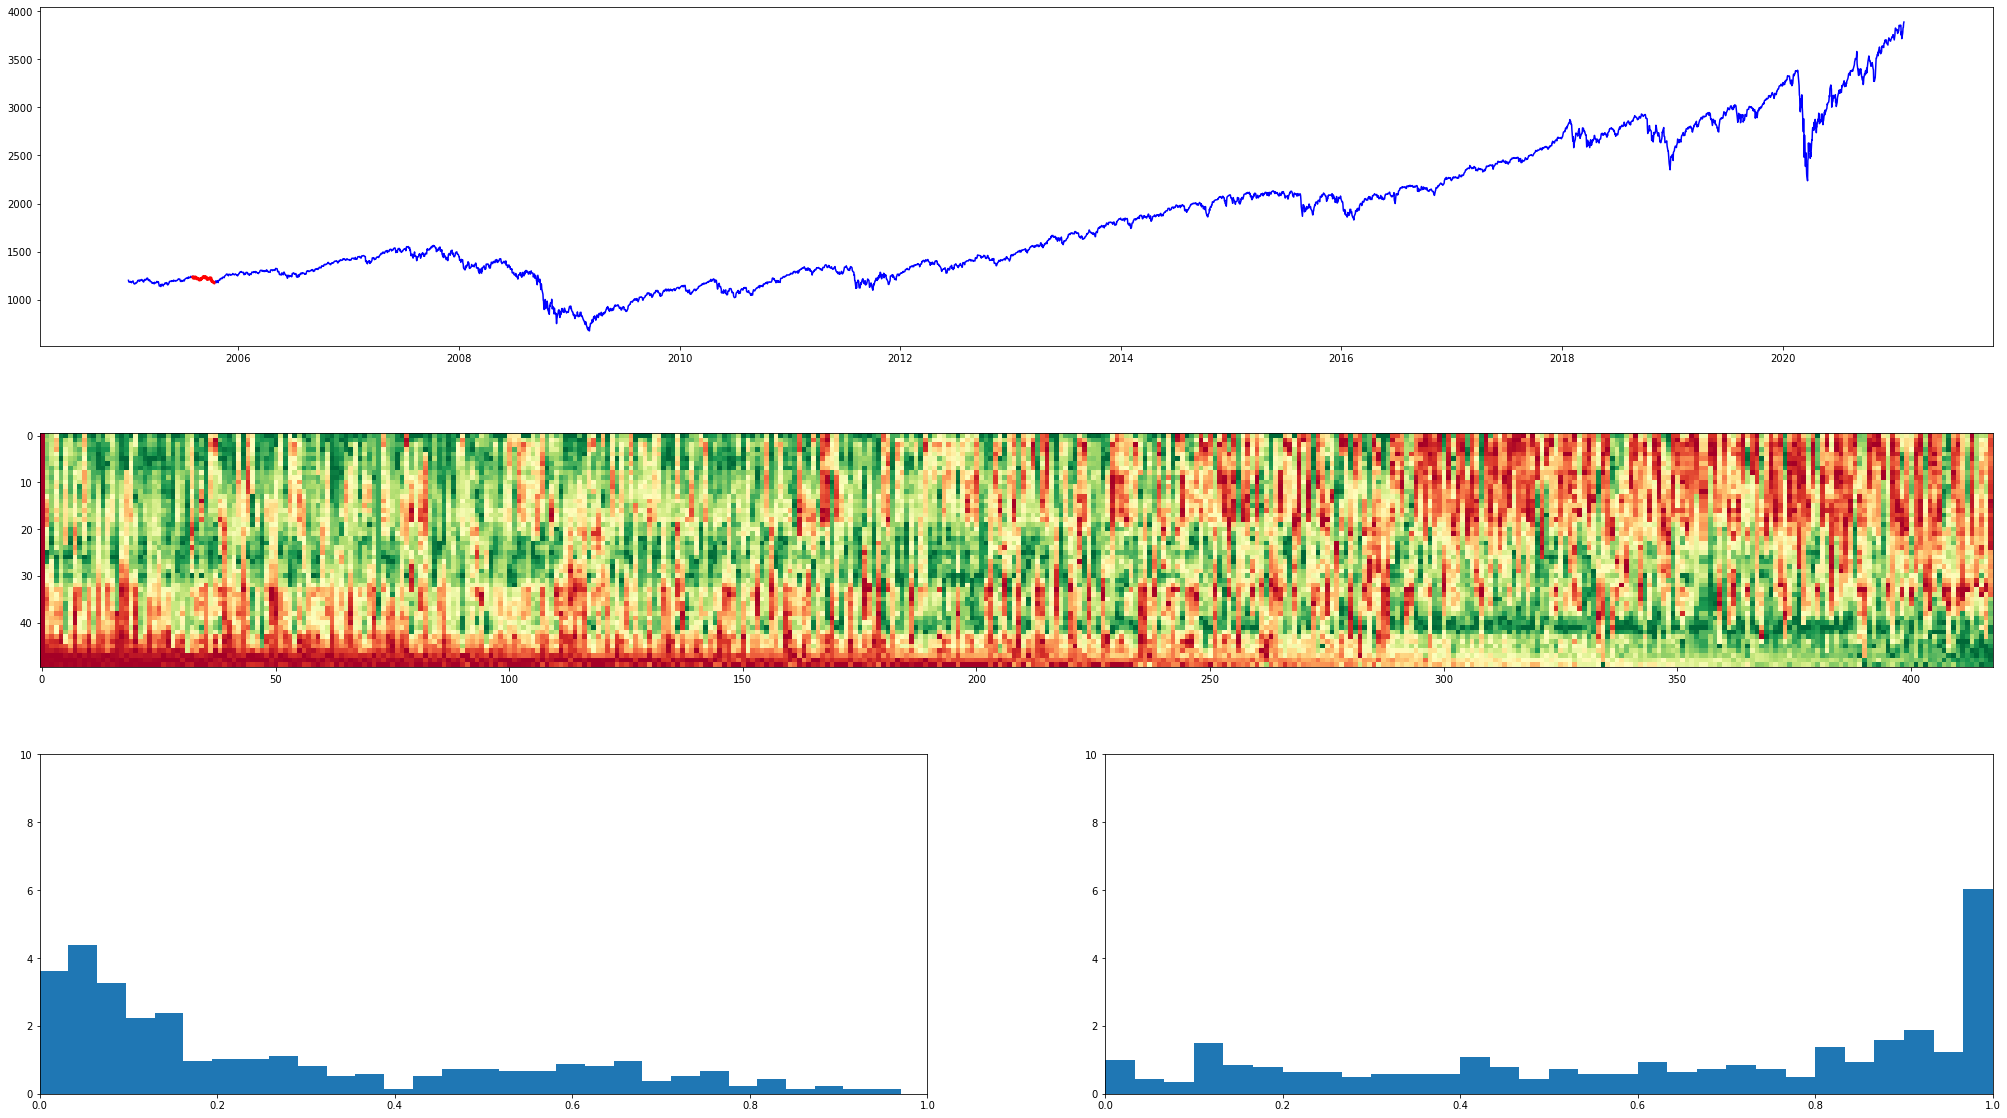

<Figure size 432x288 with 0 Axes>

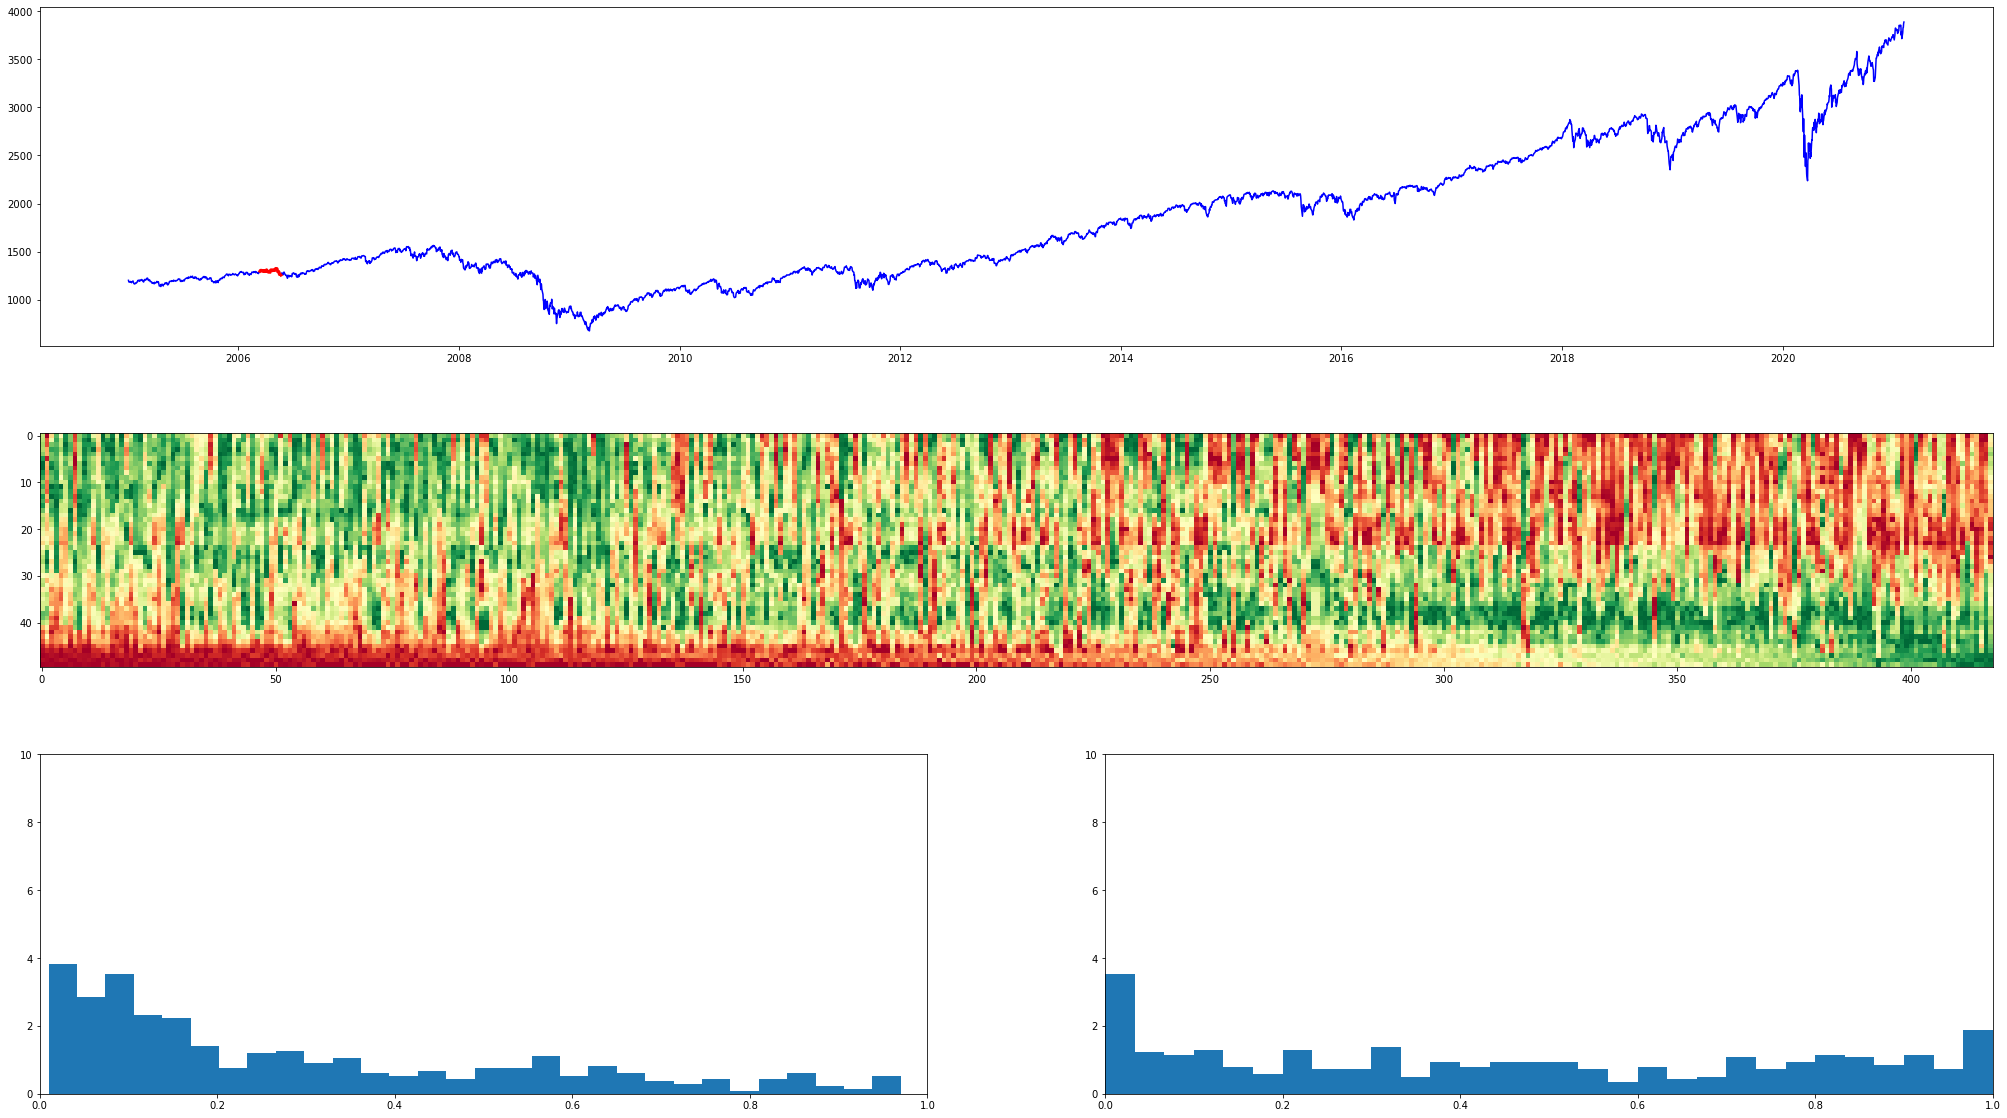

<Figure size 432x288 with 0 Axes>

In [13]:
win = 50

for i in (148, 300):
    fig, ax = plt.subplots(nrows=3, ncols=2)
    fig.set_size_inches(35, 20)
    ax0 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
    ax1 = plt.subplot2grid((3, 2), (1, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 2), (2, 0))
    ax3 = plt.subplot2grid((3, 2), (2, 1))
    fig.subplots_adjust(hspace=0.1)

    ax0.plot(df.sp, color='b')
    ax0.plot(df.sp[i:i+win], color='r', linewidth=3.0)
    
    df_stocks = df_all.iloc[i: i+win]
    df_sc = pd.DataFrame(scaler.fit_transform(df_stocks))
    
    df_sc.loc[420] = df_sc.iloc[-3:].mean(axis=0)
    df0_sc = df_sc.sort_values(by=[420], axis=1)
    df0_hist = np.round(df0_sc.iloc[-1], 2)
    df1_hist = np.round(df0_sc.iloc[0], 2)
    df0_sc = df0_sc.drop(420, axis=0)
    ax1.imshow(np.array(df0_sc), cmap='RdYlGn')
    
    ax2.hist(df0_hist, bins=30, density=True)
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 10])
    ax3.hist(df1_hist, bins=30, density=True)
    ax3.set_xlim([0, 1])
    ax3.set_ylim([0, 10])
    
    plt.show()
    plt.clf()

In [2]:
win = 50

for i in range(3975, len(df)):
    fig, ax = plt.subplots(nrows=3, ncols=2)
    fig.set_size_inches(30, 15)
    ax0 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
    ax1 = plt.subplot2grid((3, 2), (1, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 2), (2, 0))
    ax3 = plt.subplot2grid((3, 2), (2, 1))
    fig.subplots_adjust(hspace=0.1)

    ax0.plot(df.sp, color='b')
    ax0.plot(df.sp[i:i+win], color='r', linewidth=3.0)
    
    df_stocks = df_all.iloc[i: i+win]
    df_sc = pd.DataFrame(scaler.fit_transform(df_stocks))
    
    df_sc.loc[420] = df_sc.iloc[-3:].mean(axis=0)
    df0_sc = df_sc.sort_values(by=[420], axis=1)
    df0_hist = np.round(df0_sc.iloc[-1], 2)
    df1_hist = np.round(df0_sc.iloc[0], 2)
    df0_sc = df0_sc.drop(420, axis=0)
    ax1.imshow(np.array(df0_sc), cmap='RdYlGn')
    
    ax2.hist(df0_hist, bins=30, density=True)
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 15])
    ax3.hist(df1_hist, bins=30, density=True)
    ax3.set_xlim([0, 1])
    ax3.set_ylim([0, 15])
    
    plt.savefig('E:/Temp/hist/{:04d}.png'.format(i))
    plt.clf()
    plt.close('all')


In [54]:
win = 10
arr = []

for i in range(0, len(df)):    
    df_stocks = df_all.iloc[i: i+win]
    df_sc = pd.DataFrame(scaler.fit_transform(df_stocks))
    
    df_sc.loc[420] = df_sc.iloc[-5:].mean(axis=0)
    df0_sc = df_sc.sort_values(by=[420], axis=1)
    df0_sc = df0_sc.drop(420, axis=0)
    
    df_sc.loc[420] = df_sc.iloc[:5].mean(axis=0)
    df1_sc = df_sc.sort_values(by=[420], axis=1, ascending=False)
    df1_sc = df1_sc.drop(420, axis=0)
    
    arr.append(precision(df0_sc.columns, df1_sc.columns))

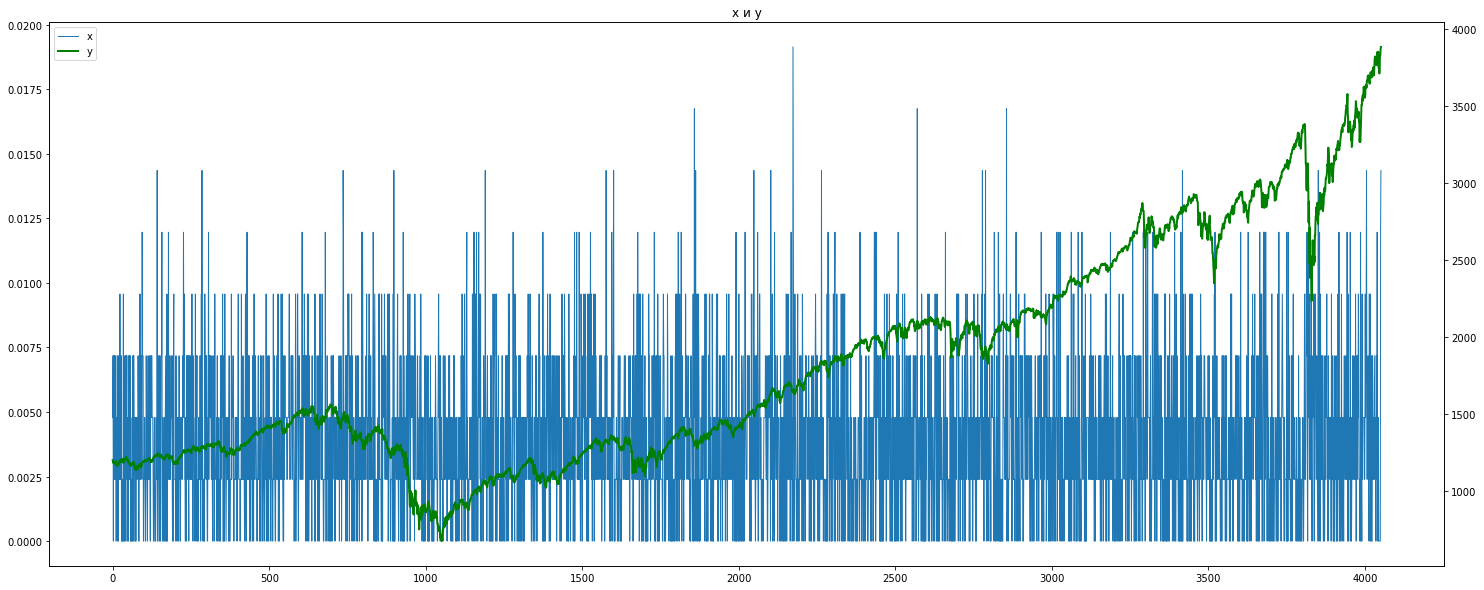

In [55]:
x = pd.Series(arr)
df_ = df.reset_index(drop=True)
x.reset_index(drop=True, inplace=True)
df_ = df_.join(x.rename('0'))

fig, ax = plt.subplots()
ax.set_title('x и y')
fig.set_size_inches(25, 10)

lns1 = ax.plot(df_['0'], linewidth=1, label='x')
ax2 = ax.twinx()
lns2 = ax2.plot(df_.sp, linewidth=2, c='g', label='y')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')

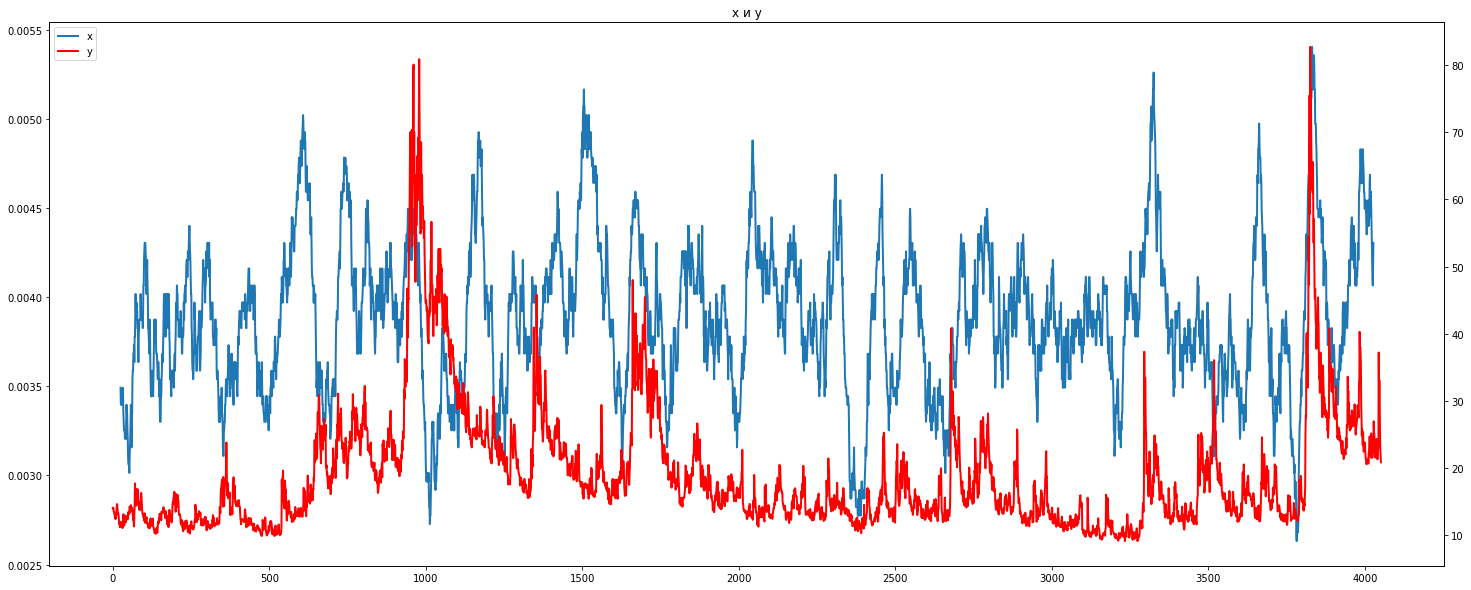

In [56]:
fig, ax = plt.subplots()
ax.set_title('x и y')
fig.set_size_inches(25, 10)

lns1 = ax.plot(df_['0'].rolling(window=50, center=True).mean(), linewidth=2, label='x')
ax2 = ax.twinx()
lns2 = ax2.plot(df_.vix, linewidth=2, c='r', label='y')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')

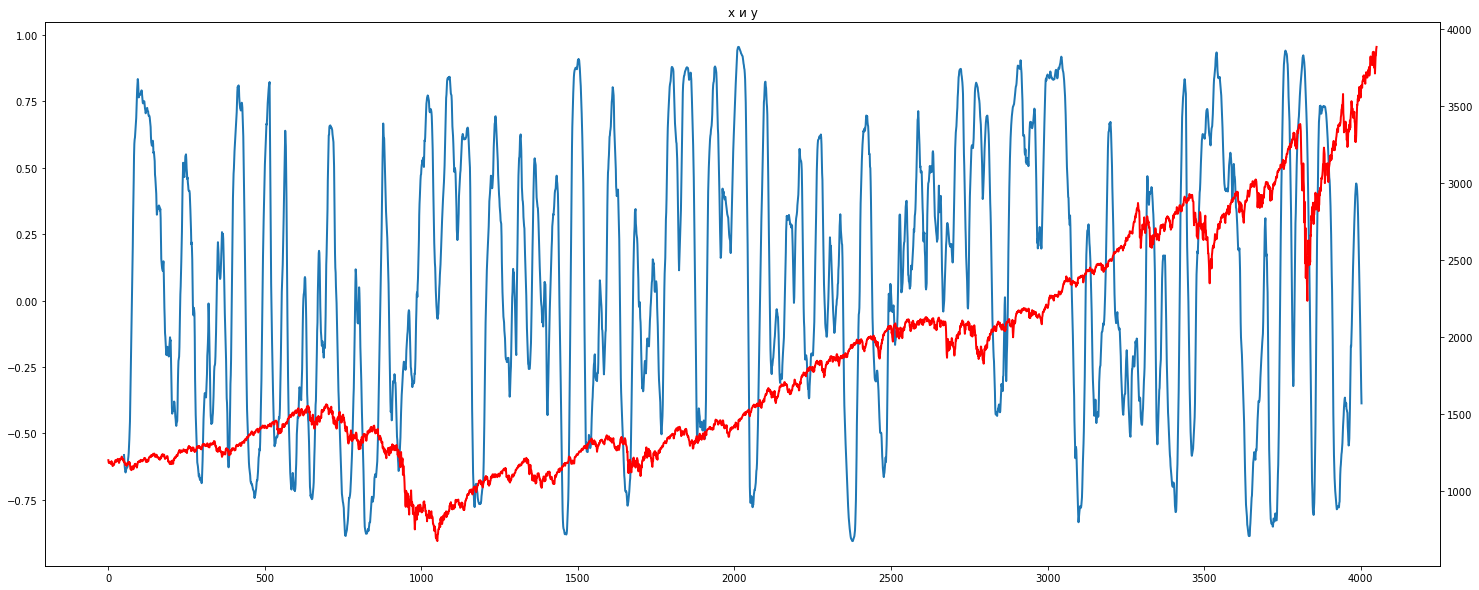

In [57]:
fig, ax = plt.subplots()
ax.set_title('x и y')
fig.set_size_inches(25, 10)

lns1 = ax.plot(df_['0'].rolling(window=50, center=True).mean()\
               .rolling(window=50, center=True).corr(df_.sp), linewidth=2, label='x')
ax2 = ax.twinx()
lns2 = ax2.plot(df_.sp, linewidth=2, c='r', label='y')